In [142]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sts
import seaborn as sns
import random
import math

In [110]:
#1
data = pd.read_csv('insurance.csv', sep=',')

In [111]:
#2
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


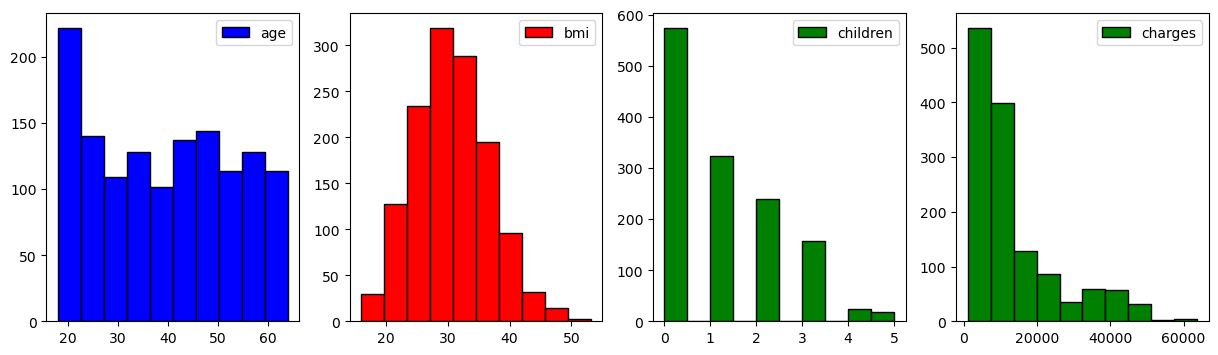

In [112]:
#3
fig, ax = plt.subplots(1, 4, figsize=(15, 4))
ax[0].hist(data['age'], edgecolor='black', color='blue', label='age')
ax[0].legend()
ax[1].hist(data['bmi'], edgecolor='black', color='red', label='bmi')
ax[1].legend()
ax[2].hist(data['children'], edgecolor='black', color='green', label='children')
ax[2].legend()
ax[3].hist(data['charges'], edgecolor='black', color='green', label='charges')
ax[3].legend()

plt.show()

In [113]:
#4
print('Меры центральной тенденции и меры разброса для индекса массы тела')
bmi_mean = np.mean(data.bmi)
bmi_moda = sts.mode(data.bmi)
bmi_med = np.median(data.bmi)

print('Среднее значение', bmi_mean)
print('Мода', bmi_moda)
print('Медиана', bmi_med)

bmi_raz = data.bmi.max() - data.bmi.min()
bmi_std = data.bmi.std()
bmi_iqr = sts.iqr(data.bmi, interpolation='midpoint')

print('Стандартное отклонение', bmi_std)
print('Размах', bmi_raz)
print('Межквартильный размах', bmi_iqr)

print('')
print('Меры центральной тенденции и меры разброса для расходов')
charges_mean = np.mean(data.charges)
charges_moda = sts.mode(data.charges)
charges_med = np.median(data.charges)

print('Среднее значение', charges_mean)
print('Мода', charges_moda)
print('Медиана', charges_med)

charges_raz = data.charges.max() - data.charges.min()
charges_std = data.charges.std()
charges_iqr = sts.iqr(data.charges, interpolation='midpoint')

print('Стандартное отклонение', charges_std)
print('Размах', charges_raz)
print('Межквартильный размах', charges_iqr)

Меры центральной тенденции и меры разброса для индекса массы тела
Среднее значение 30.66339686098655
Мода ModeResult(mode=array([32.3]), count=array([13]))
Медиана 30.4
Стандартное отклонение 6.098186911679017
Размах 37.17
Межквартильный размах 8.384999999999998

Меры центральной тенденции и меры разброса для расходов
Среднее значение 13270.422265141257
Мода ModeResult(mode=array([1639.5631]), count=array([2]))
Медиана 9382.033
Стандартное отклонение 12110.011236693994
Размах 62648.554110000005
Межквартильный размах 11879.80148


C:\Users\vovaf\AppData\Local\Temp\ipykernel_2456\3239829111.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  bmi_moda = sts.mode(data.bmi)
C:\Users\vovaf\AppData\Local\Temp\ipykernel_2456\3239829111.py:22: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  charges_m

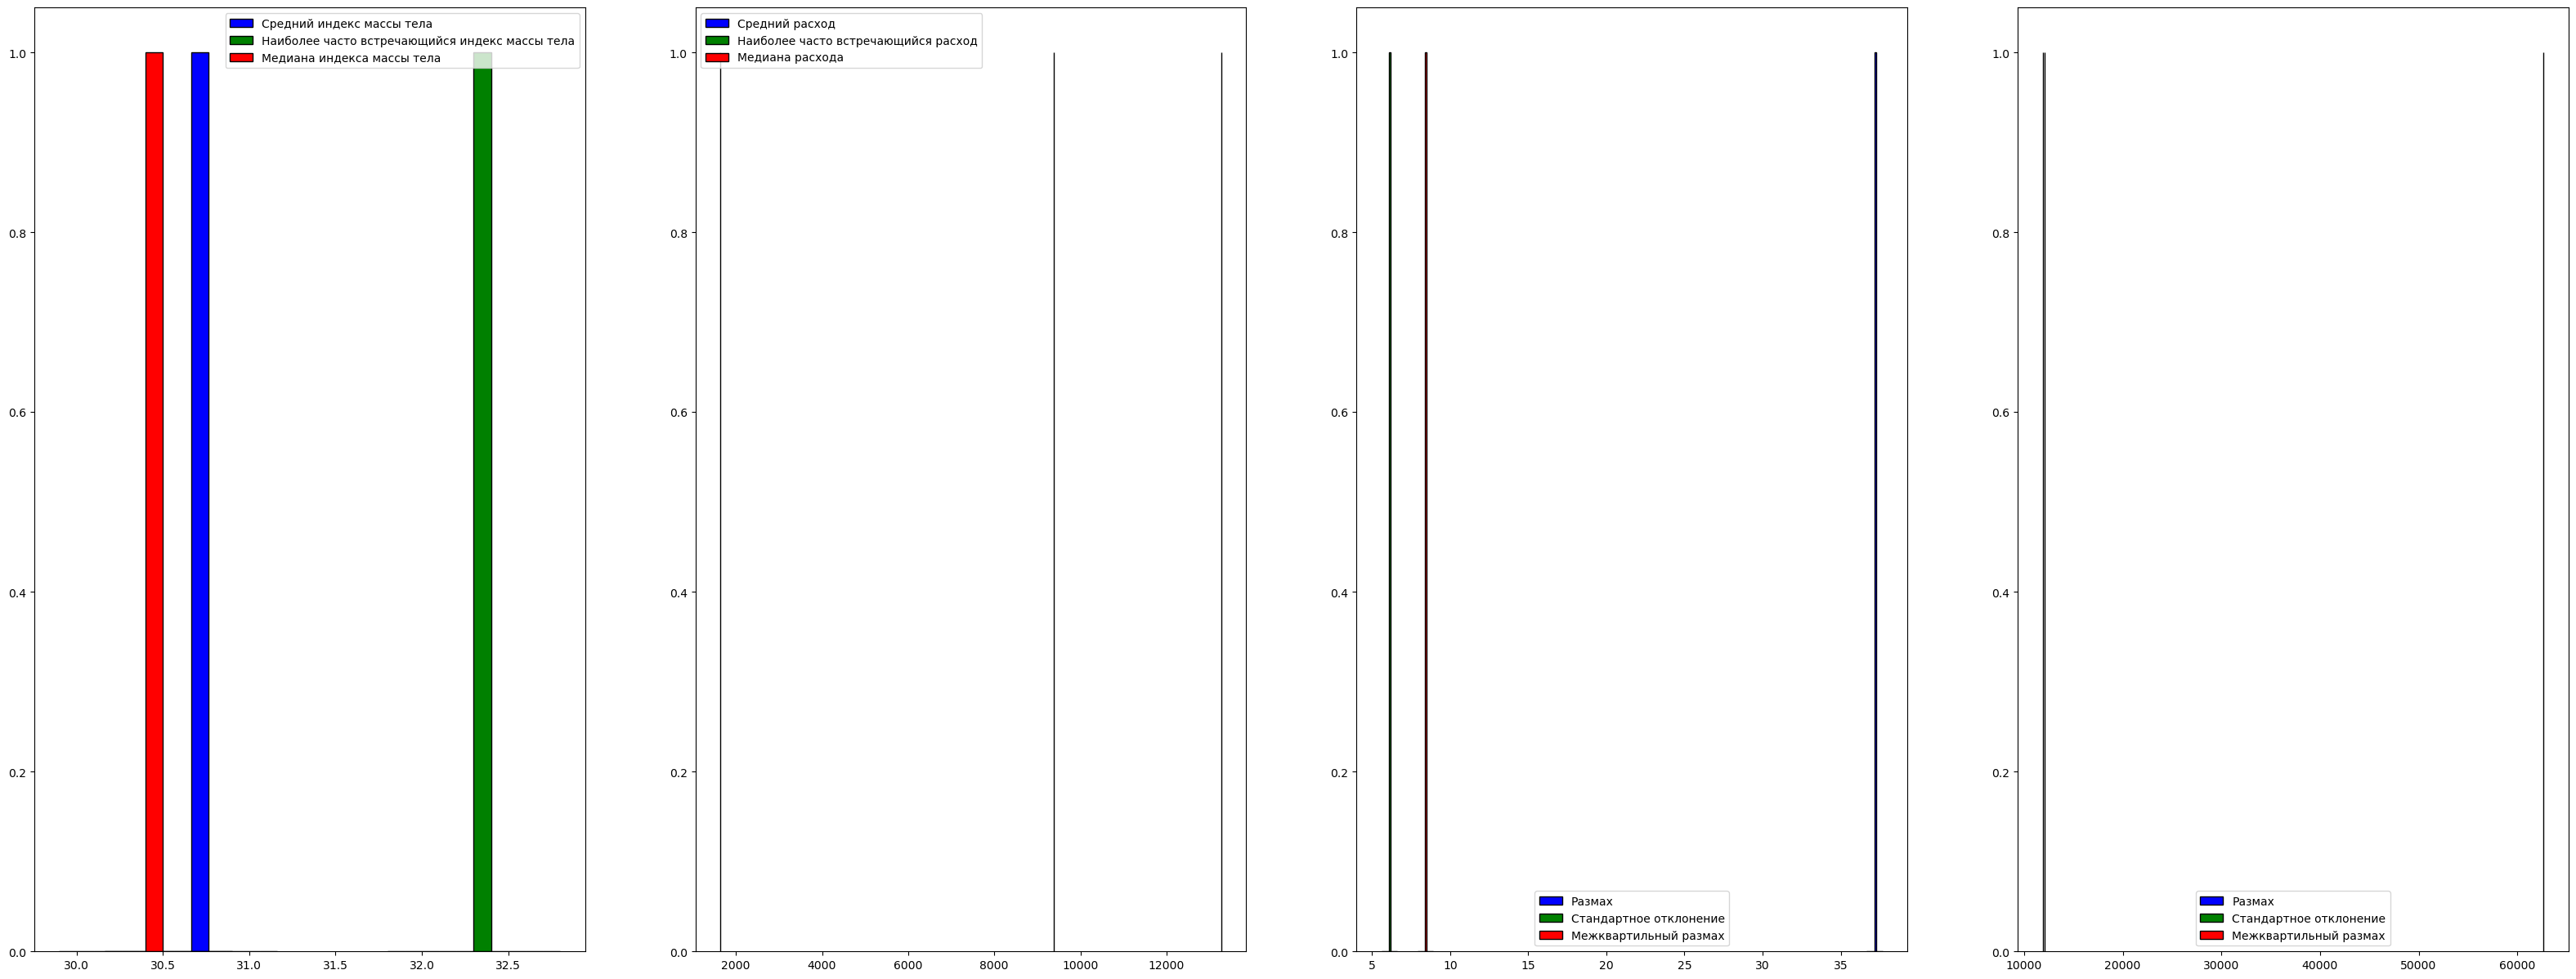

In [114]:
fig, ax = plt.subplots(1, 4, figsize=(40, 15))
ax[0].hist(bmi_mean, edgecolor='black', color='blue', label='Средний индекс массы тела')
ax[0].hist(bmi_moda.mode, edgecolor='black', color='green', label='Наиболее часто встречающийся индекс массы тела')
ax[0].hist(bmi_med, edgecolor='black', color='red', label='Медиана индекса массы тела')
ax[0].legend()

ax[1].hist(charges_mean, edgecolor='black', color='blue', label='Средний расход')
ax[1].hist(charges_moda.mode, edgecolor='black', color='green', label='Наиболее часто встречающийся расход')
ax[1].hist(charges_med, edgecolor='black', color='red', label='Медиана расхода')
ax[1].legend()

ax[2].hist(bmi_raz, edgecolor='black', color='blue', label='Размах')
ax[2].hist(bmi_std, edgecolor='black', color='green', label='Стандартное отклонение')
ax[2].hist(bmi_iqr, edgecolor='black', color='red', label='Межквартильный размах')
ax[2].legend()

ax[3].hist(charges_raz, edgecolor='black', color='blue', label='Размах')
ax[3].hist(charges_std, edgecolor='black', color='green', label='Стандартное отклонение')
ax[3].hist(charges_iqr, edgecolor='black', color='red', label='Межквартильный размах')
ax[3].legend()

plt.show()

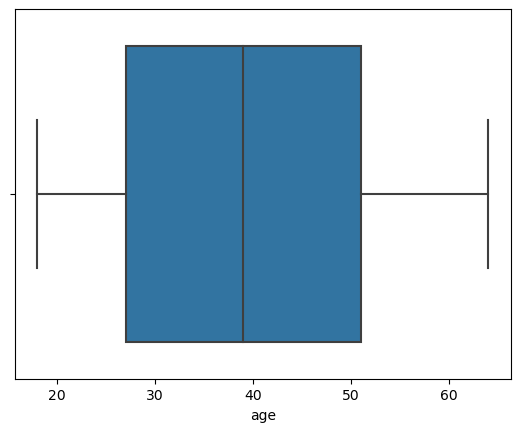

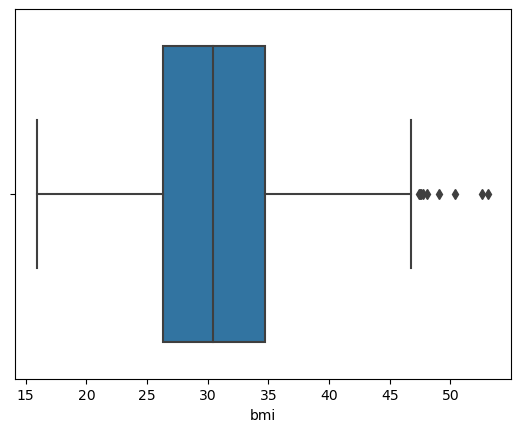

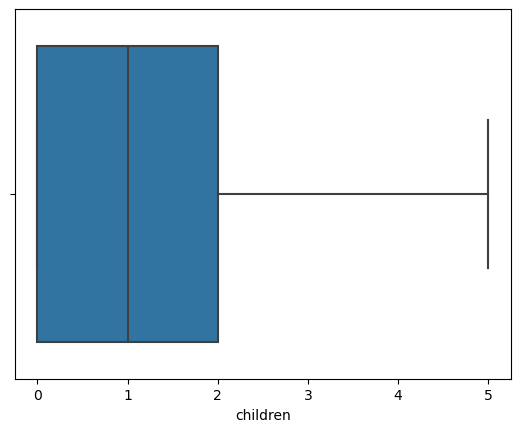

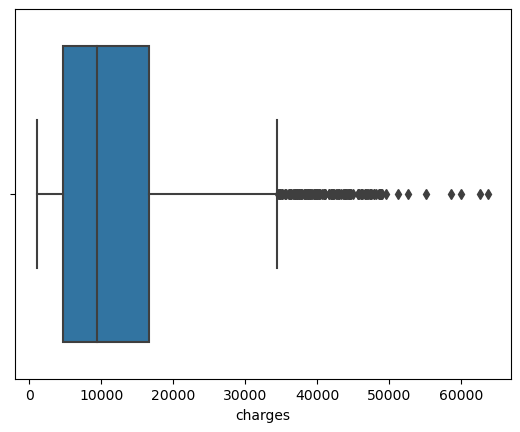

In [115]:
#5
sns.boxplot(x=data.age)
plt.show()

sns.boxplot(x=data.bmi)
plt.show()

sns.boxplot(x=data.children)
plt.show()

sns.boxplot(x=data.charges)
plt.show()

In [116]:
#6
def sample_gen(n):
    sample = []
    sample_mean = []
    for i in range(300):
        sample = random.sample(data.bmi.tolist(), n)
        sample_mean.append(np.array(sample).mean())    
    return sample_mean

In [117]:
sample_10 = sample_gen(10)
sample_50 = sample_gen(50)
sample_250 = sample_gen(250)
sample_500 = sample_gen(500)

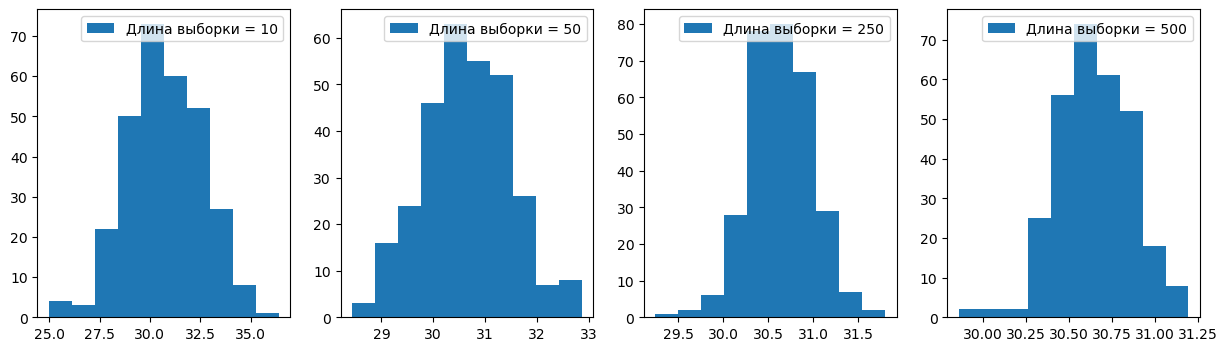

In [118]:
fig, ax = plt.subplots(1, 4, figsize=(15, 4))

ax[0].hist(sample_10, label='Длина выборки = 10')
ax[0].legend()
ax[1].hist(sample_50, label='Длина выборки = 50')
ax[1].legend()
ax[2].hist(sample_250, label='Длина выборки = 250')
ax[2].legend()
ax[3].hist(sample_500, label='Длина выборки = 500')
ax[3].legend()

plt.show()

In [119]:
std_sample_10 = np.std(sample_10)
std_sample_50 = np.std(sample_50)
std_sample_250 = np.std(sample_250)
std_sample_500 = np.std(sample_500)

print(std_sample_10)
print(std_sample_50)
print(std_sample_250)
print(std_sample_500)

1.8687699722448154
0.8330075561911523
0.3502631028884558
0.21243021331455073


In [120]:
print(np.mean(sample_10))
print(np.mean(sample_50))
print(np.mean(sample_250))
print(np.mean(sample_500))

30.716918333333336
30.650255333333334
30.642359466666665
30.650137033333333


In [121]:
#7
n = len(data.bmi)
med_x = np.mean(data.bmi)
sdx = np.std(data.bmi)
SE = sdx/math.sqrt(n)

print('Среднее значение всех элементов', med_x)

interval_95 = [med_x - 1.96*SE, med_x + 1.96*SE]
print('Доверительный интервал 95%', interval_95)
interval_99 = [med_x - 2.58*SE, med_x + 2.58*SE]
print('Доверительный интервал 99%', interval_99)

Среднее значение всех элементов 30.66339686098655
Доверительный интервал 95% [30.336759097652553, 30.990034624320543]
Доверительный интервал 99% [30.233434907210167, 31.09335881476293]


In [122]:
n = len(data.charges)
med_x = np.mean(data.charges)
sdx = np.std(data.charges)
SE = sdx/math.sqrt(n)

print('Среднее значение всех элементов', med_x)

interval_95 = [med_x - 1.96*SE, med_x + 1.96*SE]
print('Доверительный интервал 95%', interval_95)
interval_99 = [med_x - 2.58*SE, med_x + 2.58*SE]
print('Доверительный интервал 99%', interval_99)

Среднее значение всех элементов 13270.422265141257
Доверительный интервал 95% [12621.772585885332, 13919.071944397181]
Доверительный интервал 99% [12416.58748326356, 14124.257047018953]


KstestResult(statistic=0.03306380718532742, pvalue=0.6328325275734707, statistic_location=-0.3936054110612799, statistic_sign=1)
KstestResult(statistic=0.18744173178172674, pvalue=7.464339198969204e-16, statistic_location=0.04151734738534663, statistic_sign=1)


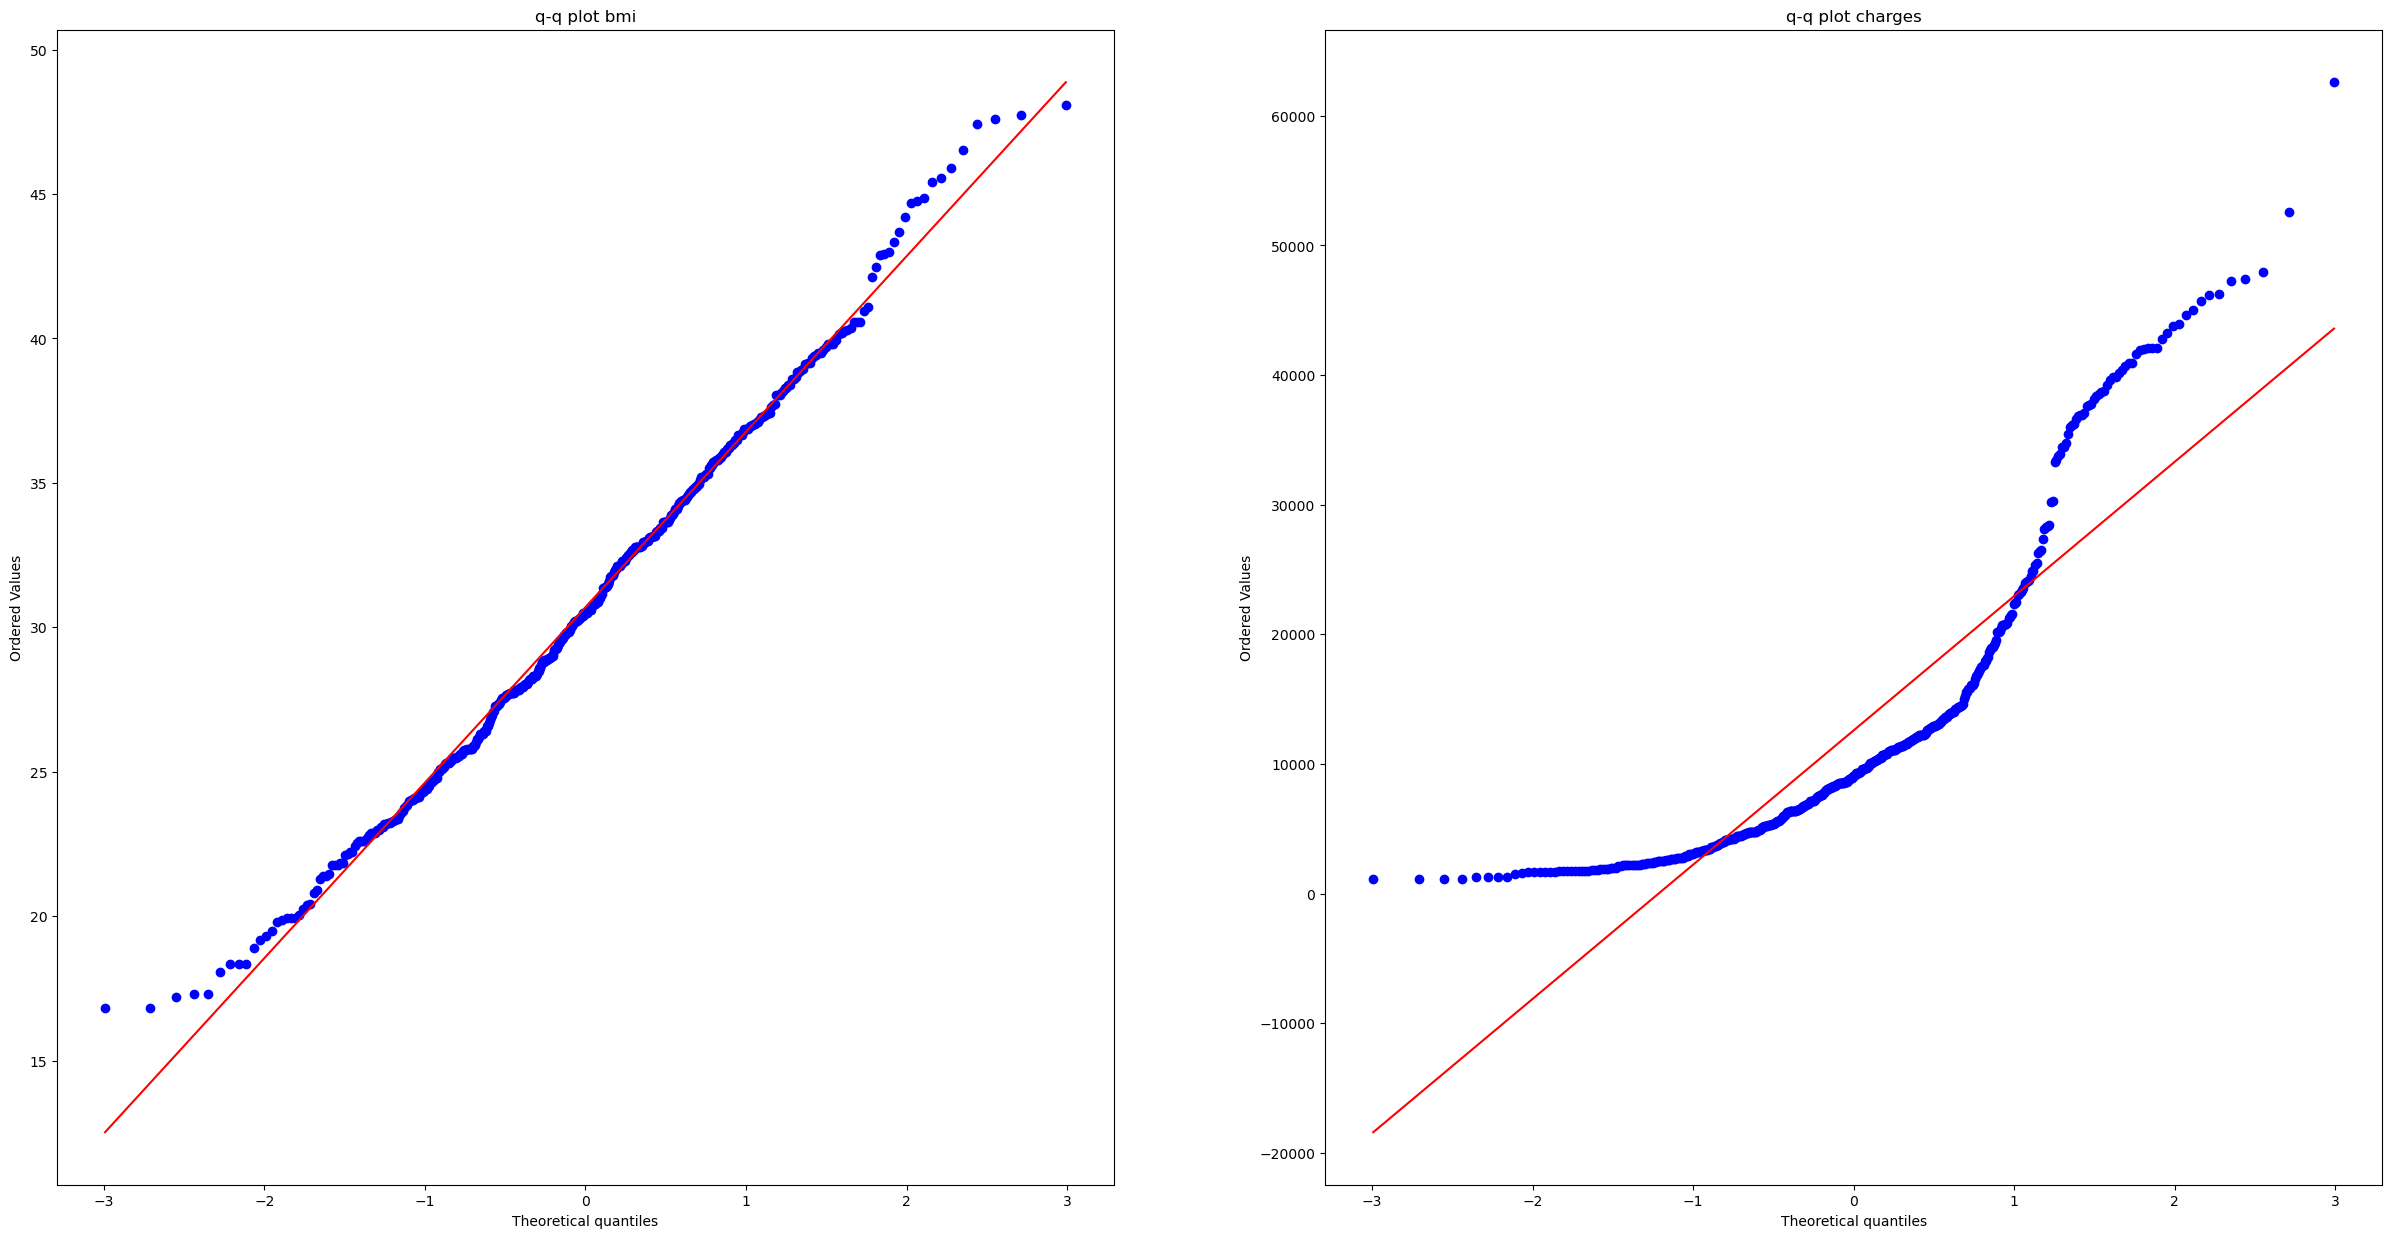

In [123]:
#8
sample_bmi = data['bmi'].sample(500)
sample_charges = data['charges'].sample(500)

test_ks_bmi = sts.kstest(sts.zscore(sample_bmi), 'norm')
print(test_ks_bmi)

test_ks_charges = sts.kstest(sts.zscore(sample_charges), 'norm')
print(test_ks_charges)

fig, ax = plt.subplots(1, 2, figsize=(30,15))
sts.probplot(sample_bmi, dist='norm', plot=ax[0])
ax[0].set_title('q-q plot bmi')
sts.probplot(sample_charges, plot=ax[1])
ax[1].set_title('q-q plot charges')
plt.show()

In [124]:
#9
data = pd.read_csv('ECDCCases.csv', sep=',')

In [125]:
#10
for column in data.columns:
    missing = np.mean(data[column].isna()*100)
    print(f' {column} : {round(missing,1)}%')

 dateRep : 0.0%
 day : 0.0%
 month : 0.0%
 year : 0.0%
 cases : 0.0%
 deaths : 0.0%
 countriesAndTerritories : 0.0%
 geoId : 0.4%
 countryterritoryCode : 0.2%
 popData2019 : 0.2%
 continentExp : 0.0%
 Cumulative_number_for_14_days_of_COVID-19_cases_per_100000 : 4.7%


In [126]:
data.drop('Cumulative_number_for_14_days_of_COVID-19_cases_per_100000', axis = 1, inplace=True)
data.drop('geoId', axis = 1, inplace=True)

In [127]:
for column in data.columns:
    missing = np.mean(data[column].isna()*100)
    print(f' {column} : {round(missing,1)}%')

 dateRep : 0.0%
 day : 0.0%
 month : 0.0%
 year : 0.0%
 cases : 0.0%
 deaths : 0.0%
 countriesAndTerritories : 0.0%
 countryterritoryCode : 0.2%
 popData2019 : 0.2%
 continentExp : 0.0%


In [128]:
data.countryterritoryCode.fillna('Other', inplace=True)

In [129]:
median = data.popData2019.median()
data.popData2019.fillna(median, inplace=True)

In [130]:
data.isna().sum()

dateRep                    0
day                        0
month                      0
year                       0
cases                      0
deaths                     0
countriesAndTerritories    0
countryterritoryCode       0
popData2019                0
continentExp               0
dtype: int64

In [131]:
#11
data.describe()

,day,month,year,cases,deaths,popData2019
count,61904.000000,61904.000000,61904.000000,61904.000000,61904.000000,6.190400e+04
mean,15.629232,7.067104,2019.998918,1155.079026,26.053987,4.091909e+07
std,8.841624,2.954816,0.032881,6779.010824,131.222948,1.529798e+08
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.324820e+06
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09


In [132]:
data[(data['deaths']>3000)]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp
2118,02/10/2020,2,10,2020,14001,3351,Argentina,ARG,44780675.0,America
16908,07/09/2020,7,9,2020,-8261,3800,Ecuador,ECU,17373657.0,America
37038,09/10/2020,9,10,2020,4936,3013,Mexico,MEX,127575529.0,America
44888,14/08/2020,14,8,2020,9441,3935,Peru,PER,32510462.0,America
44909,24/07/2020,24,7,2020,4546,3887,Peru,PER,32510462.0,America
59007,12/12/2020,12,12,2020,234633,3343,United_States_of_America,USA,329064917.0,America
59009,10/12/2020,10,12,2020,220025,3124,United_States_of_America,USA,329064917.0,America
59016,03/12/2020,3,12,2020,203311,3190,United_States_of_America,USA,329064917.0,America
59239,24/04/2020,24,4,2020,26543,3179,United_States_of_America,USA,329064917.0,America
59245,18/04/2020,18,4,2020,30833,3770,United_States_of_America,USA,329064917.0,America


In [133]:
data[(data['deaths']>3000)].value_counts('countriesAndTerritories')

countriesAndTerritories
United_States_of_America    6
Peru                        2
Argentina                   1
Ecuador                     1
Mexico                      1
dtype: int64

In [134]:
#12
duplicate = data.duplicated()
data[duplicate]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp
3,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
218,12/05/2020,12,5,2020,285,2,Afghanistan,AFG,38041757.0,Asia
48010,29/05/2020,29,5,2020,0,0,Saint_Lucia,LCA,182795.0,America
48073,28/03/2020,28,3,2020,0,0,Saint_Lucia,LCA,182795.0,America


In [135]:
data.drop_duplicates()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp
0,14/12/2020,14,12,2020,746,6,Afghanistan,AFG,38041757.0,Asia
1,13/12/2020,13,12,2020,298,9,Afghanistan,AFG,38041757.0,Asia
2,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
4,11/12/2020,11,12,2020,63,10,Afghanistan,AFG,38041757.0,Asia
5,10/12/2020,10,12,2020,202,16,Afghanistan,AFG,38041757.0,Asia
...,...,...,...,...,...,...,...,...,...,...
61899,25/03/2020,25,3,2020,0,0,Zimbabwe,ZWE,14645473.0,Africa
61900,24/03/2020,24,3,2020,0,1,Zimbabwe,ZWE,14645473.0,Africa
61901,23/03/2020,23,3,2020,0,0,Zimbabwe,ZWE,14645473.0,Africa
61902,22/03/2020,22,3,2020,1,0,Zimbabwe,ZWE,14645473.0,Africa


In [143]:
#13
data = pd.read_csv('bmi.csv', sep=',')
data.is_copy = False

In [144]:
northwest_data = data[data.region=='northwest'] 
southwest_data = data[data.region=='southwest']

In [145]:
northwest_data_array = np.array(northwest_data)
southwest_data_array = np.array(southwest_data)

northwest_data_array.resize(325, )
southwest_data_array.resize(325, )

In [146]:
res1_shapiro = sts.shapiro(northwest_data_array)
res2_shapiro = sts.shapiro(southwest_data_array)
print(res1_shapiro, '\n', res2_shapiro)

ShapiroResult(statistic=0.9954646825790405, pvalue=0.4655335247516632) 
 ShapiroResult(statistic=0.9949268698692322, pvalue=0.3629520535469055)


In [147]:
res_bartlett = sts.bartlett(northwest_data_array, southwest_data_array)
print(res_bartlett)

BartlettResult(statistic=3.4000745256463825, pvalue=0.06519347353580048)


In [150]:
northwest_data_array = list(northwest_data_array)
southwest_data_array = list(southwest_data_array)
t_res = sts.ttest_ind(northwest_data_array, southwest_data_array)
print(t_res)

Ttest_indResult(statistic=-3.2844171500398582, pvalue=0.001076958496307695)


In [99]:
#14
result = {'N': [1,2,3,4,5,6],
          'num_drops': [97,98,109,95,97,104]
          }

df_result = pd.DataFrame(result)

In [45]:
df_result

,N,num_drops
0,1,97
1,2,98
2,3,109
3,4,95
4,5,97
5,6,104


In [46]:
sts.chisquare(df_result['num_drops'])

Power_divergenceResult(statistic=1.44, pvalue=0.9198882077437889)

In [47]:
#15
data = pd.DataFrame({'Женат': [89,17,11,43,22,1],
                     'Гражданский брак': [80,22,20,35,6,4],
                     'Не состоит в отношениях': [35,44,35,6,8,22]})
data.index = ['Полный рабочий день',
              'Частичная занятость',
              'Временно не работает',
              'На домохозяйстве',
              'На пенсии',
              'Учёба']

data

,Женат,Гражданский брак,Не состоит в отношениях
Полный рабочий день,89,80,35
Частичная занятость,17,22,44
Временно не работает,11,20,35
На домохозяйстве,43,35,6
На пенсии,22,6,8
Учёба,1,4,22


In [48]:
sts.chi2_contingency(data)[:3]

(122.29654948595365, 1.7291616900960234e-21, 10)